# The Porto Seguro kaggle challenge

## 1. Data Description

In this competition, you will predict the probability that an auto insurance policy holder files a claim.

In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., `ind` , `reg`, `car`, `calc`). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

## 2. File descriptions

- `train.csv` contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.
- `test.csv` contains the test data.

## 3. Aim

- Build a classifier using the training dataset that leads to a good ROC and Precision / Recall curve on the testing set
- The notebook should describe your steps, explain what you do and should run entirely without bugs. It should contain some descriptive statistics and quick study, to understand some things about the data...
- It must end with plots of the ROC and precision/recall curves obtained on the testing dataset

<a id='toc'></a>
# Sommaire

I. [Analyse exploratoire des données](#eda)<br>
1) [Etude des données brutes](#edb)<br>
a) [Importation des données](#imp)<br>
b) [Analyse descriptive des données](#add)<br>
c) [Types des données](#typd)<br>
d) [Valeurs manquantes](#vm)<br>
e) [Distribution de la variable cible](#dvc)<br>
2)	Visualisation des données
a)	Corrélation des features selon leur type 
b)	Distribution des features

[II.Pré-traitement des données](#preprocess)<br>
1)	Suppression de features
2)	Encodage des données catégorielles
3)	Centrage et réduction des variables continues
4)	ACP 

[III. Construction des modèles](#traintest)<br>
1)	Choix du classifieur
2)	Tuning des hyperparamètres


<a id='eda'></a>
# I. Analyse exploratoire des données

<a id='edb'></a>
## 1)	Etude des données brutes

<a id='imp'></a>
### a) Importation des données

In [1]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, auc, precision_recall_curve, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from mlxtend.classifier import StackingCVClassifier
import warnings
warnings.filterwarnings('ignore')


# Use the path to your filename

#Importation locale

#Chemin Kenny
#path = ''

#Chemin Mickaël
#path = '/home/chopin/Bureau/M2MOdata/machine_learning/tp2challenge'

#df = pd.read_csv(os.path.join(path, 'train.csv'))
#df_test = pd.read_csv(os.path.join(path, 'test.csv'))

#Importation kaggle

df = pd.read_csv("../input/data/train.csv")
df_test = pd.read_csv("../input/data/test.csv")

<a id='add'></a>
### b) Analyse descriptive des données

In [2]:
df.head(5)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [4]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
id                892816 non-null int64
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892816 non-null int64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892816 non-null int64
ps_ind_05_cat     892816 non-null int64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_reg_03         892816 non-null float64
ps_

In [6]:
df_test.describe()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,8.928160e+05,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.00000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000,892816.000000
mean,7.441535e+05,1.902371,1.358613,4.413734,0.417361,0.408132,0.393246,0.257191,0.163659,0.185905,0.000373,0.001595,0.009376,0.001039,0.012383,7.296862,0.660591,0.120399,0.154973,0.611057,0.439868,0.551740,8.292038,0.82994,-0.504895,0.725798,-0.158449,6.564297,0.910144,0.832311,1.327911,0.992134,62.284293,2.346606,0.379957,0.813637,0.276431,3.068325,0.449632,0.450453,0.450054,2.371390,1.885328,7.687805,3.009537,9.225854,2.338538,8.443167,5.438478,1.440265,2.875013,7.540367,0.123720,0.627756,0.554660,0.287796,0.349344,0.152428
std,4.296830e+05,1.986503,0.663002,2.700149,0.493453,1.355068,0.488471,0.437086,0.369966,0.389030,0.019309,0.039905,0.096375,0.032223,0.127251,3.541948,0.473509,0.325428,0.361879,0.287699,0.404678,0.794023,2.508331,0.37570,0.788753,2.154886,0.844566,5.500485,0.347283,0.373590,0.978741,0.091530,33.003714,0.831666,0.058385,0.224779,0.356835,0.729005,0.287213,0.287373,0.287254,1.116953,1.136763,1.333521,1.415155,1.460560,1.248601,2.906361,2.330081,1.200620,1.694072,2.745882,0.329262,0.483403,0.497004,0.452736,0.476763,0.359435
min,0.000000e+00,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.00000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,0.141421,0.275778,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.720218e+05,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.524404,7.000000,1.00000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.671234,0.333916,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.443070e+05,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.721110,7.000000,1.00000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.7660

In [7]:
lignes = df.shape[0]
colonnes = df.shape[1]
print("Le jeu de données de training contient {0} lignes et {1} colonnes".format(lignes, colonnes))

Le jeu de données de training contient 595212 lignes et 59 colonnes


In [8]:
lignes_t = df_test.shape[0]
colonnes_t = df_test.shape[1]
print("Le jeu de données de test contient {0} lignes et {1} colonnes".format(lignes_t, colonnes_t))

Le jeu de données de test contient 892816 lignes et 58 colonnes


<a id='typd'></a>
### c) Type des données

In [9]:
bin_featnames = []
cat_featnames = []
cont_featnames = []
ord_featnames = []
t=[]

for s in df.columns:
    if "ps_" in s:
        #print(s[3:])
        u=s[s.find("ps_")+3:]
        v=u.find("_")
        w=u[:v]
        t.append(w)
        
    if 'cat' in s:
        cat_featnames.append(s)
        
    if 'bin' in s:
        bin_featnames.append(s)
        
    if ('bin' not in s) & ('cat' not in s) & (s in df.dtypes[df.dtypes=='int64']) & (s not in ['target', 'id']):
        ord_featnames.append(s)
        
    if ('bin' not in s) & ('cat' not in s) & (s in df.dtypes[df.dtypes=='float64']):
        cont_featnames.append(s)

featgroups=sorted(dict(Counter(t)), key=dict(Counter(t)).get, reverse=True)

print("Il y a quatre groupes de features :\n")
print(featgroups)

Il y a quatre groupes de features :

['calc', 'ind', 'car', 'reg']


In [10]:
print("Et dans ces groupes, on retrouve quatre types de données \n")

print("Les" + str(len(bin_featnames)) + "features binaires sont :\n")
for x in bin_featnames:
    print("- "+x)
print("\n")

print("Les" + str(len(cat_featnames)) + "features catégorielles sont :\n")
for x in cat_featnames:
    print("- "+x)
print("\n")

print("Les " + str(len(cont_featnames)) + " features continues sont :\n")
for x in cont_featnames:
    print("- "+x)
print("\n")

print("Les " + str(len(ord_featnames)) + " features ordinales sont :\n")
for x in ord_featnames:
    print("- "+x)

Et dans ces groupes, on retrouve quatre types de données 

Les17features binaires sont :

- ps_ind_06_bin
- ps_ind_07_bin
- ps_ind_08_bin
- ps_ind_09_bin
- ps_ind_10_bin
- ps_ind_11_bin
- ps_ind_12_bin
- ps_ind_13_bin
- ps_ind_16_bin
- ps_ind_17_bin
- ps_ind_18_bin
- ps_calc_15_bin
- ps_calc_16_bin
- ps_calc_17_bin
- ps_calc_18_bin
- ps_calc_19_bin
- ps_calc_20_bin


Les14features catégorielles sont :

- ps_ind_02_cat
- ps_ind_04_cat
- ps_ind_05_cat
- ps_car_01_cat
- ps_car_02_cat
- ps_car_03_cat
- ps_car_04_cat
- ps_car_05_cat
- ps_car_06_cat
- ps_car_07_cat
- ps_car_08_cat
- ps_car_09_cat
- ps_car_10_cat
- ps_car_11_cat


Les 10 features continues sont :

- ps_reg_01
- ps_reg_02
- ps_reg_03
- ps_car_12
- ps_car_13
- ps_car_14
- ps_car_15
- ps_calc_01
- ps_calc_02
- ps_calc_03


Les 16 features ordinales sont :

- ps_ind_01
- ps_ind_03
- ps_ind_14
- ps_ind_15
- ps_car_11
- ps_calc_04
- ps_calc_05
- ps_calc_06
- ps_calc_07
- ps_calc_08
- ps_calc_09
- ps_calc_10
- ps_calc_11
- ps_calc_1

<a id='vm'></a>
### d) Valeurs manquantes
[Retourner au sommaire](#toc)<br>

In [11]:
Nombre_de_donnees_manquantes=df.isna().sum()
Nombre_de_donnees_manquantes

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


Aucune donnée manquante n'a été détectée ici. Il n'y a donc que celles qui ont codées par la valeur -1. On relève donc les données manquantes en changeant les -1 en NaN et via le test isna()

In [12]:
donnees=df.replace(-1, np.NaN)
donnees_test=df_test.replace(-1, np.NaN)

In [13]:
Nombre_de_donnees_manquantes=donnees.isna().sum()
Nombre_de_donnees_manquantes

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


In [14]:
Nombre_de_donnees_test_manquantes=donnees_test.isna().sum()
Nombre_de_donnees_test_manquantes

id                     0
ps_ind_01              0
ps_ind_02_cat        307
ps_ind_03              0
ps_ind_04_cat        145
ps_ind_05_cat       8710
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         161684
ps_car_01_cat        160
ps_car_02_cat          5
ps_car_03_cat     616911
ps_car_04_cat          0
ps_car_05_cat     400359
ps_car_06_cat          0
ps_car_07_cat      17331
ps_car_08_cat          0
ps_car_09_cat        877
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              1
ps_car_12              0
ps_car_13              0
ps_car_14          63805
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


Faisons une liste des features ayant des données manquantes :

In [15]:
val_manquantes=donnees.columns[donnees.isna().any()].tolist()
val_manquantes

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [16]:
val_test_manquantes=donnees_test.columns[donnees_test.isna().any()].tolist()
val_test_manquantes

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_05_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_14']

Visualisons les données manquantes :

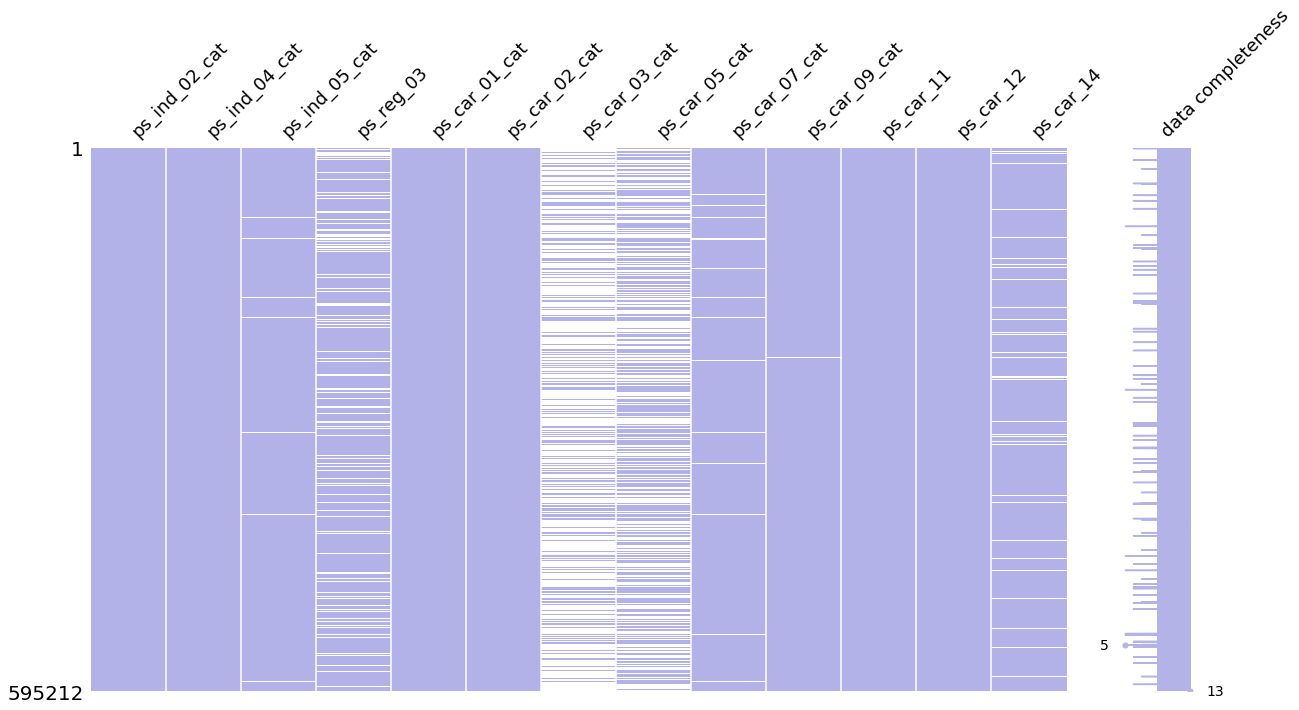

In [17]:
import missingno as msno
msno.matrix(donnees[val_manquantes],width_ratios=(10,1),figsize=(20,10),color=(0.7,0.7,0.91),fontsize=18,\
            sparkline=True,labels=True)

Calculons les pourcentages de données manquantes :

In [18]:
donnees_copy = (Nombre_de_donnees_manquantes / len(donnees)) * 100 
donnees_copy = donnees_copy.drop(donnees_copy[donnees_copy == 0].index).sort_values(ascending=False)[:30]
# Rajouter une colonne avec le nombre de NaN avec pd.concat
manquantes = pd.DataFrame({'Données manquantes en %' :donnees_copy})
manquantes

,Données manquantes en %
ps_car_03_cat,69.089837
ps_car_05_cat,44.782531
ps_reg_03,18.106490
ps_car_14,7.160474
ps_car_07_cat,1.930237
ps_ind_05_cat,0.975955
ps_car_09_cat,0.095596
ps_ind_02_cat,0.036290
ps_car_01_cat,0.017977
ps_ind_04_cat,0.013945


In [19]:
donnees_test_copy = (Nombre_de_donnees_test_manquantes / len(donnees_test)) * 100 
donnees_test_copy = donnees_test_copy.drop(donnees_test_copy[donnees_test_copy == 0].index).sort_values(ascending=False)[:30]
# Rajouter une colonne avec le nombre de NaN avec pd.concat
manquantes_test = pd.DataFrame({'Données test manquantes en %' :donnees_test_copy})
manquantes_test

,Données test manquantes en %
ps_car_03_cat,69.097216
ps_car_05_cat,44.842274
ps_reg_03,18.109442
ps_car_14,7.146489
ps_car_07_cat,1.941161
ps_ind_05_cat,0.975565
ps_car_09_cat,0.098229
ps_ind_02_cat,0.034386
ps_car_01_cat,0.017921
ps_ind_04_cat,0.016241


<a id='dvc'></a>
### Distribution de la variable cible

In [20]:
#target=donnees.pop("target")
target = donnees.target
#type(target)
#target

In [21]:
target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [22]:
print("Le pourcentage de déclaration de sinistre est : " + str(np.mean(donnees["target"])))

Le pourcentage de déclaration de sinistre est : 0.036447517859182946


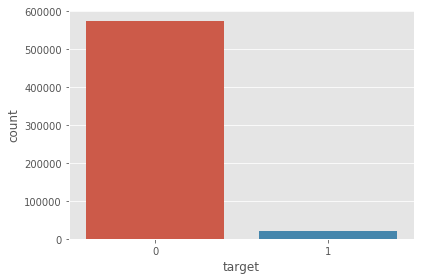

In [23]:
plt.style.use('ggplot')
sns.despine(left=True)
ax=sns.countplot(x=target, data=donnees)

plt.tight_layout()

Il n'y a que 3.6% de déclaration de sinistres. On voir donc que le jeu de données est très déséquilibré. C'est surement la raison de cette compétition Kaggle. En effet, si la valeur 1 est aussi sous-représentée, il devient difficle de la prédire. Le but est alors soit de mieux prédire les futures déclarations de sinistres soit de détecter de la fraude.

Pour effectuer de bonnes prédictions malgré ce déséquilibre on peut sous-échantillonner les données de la classe dominante, sur-échantillonner les données de la classe minoritaire ou bien encore stratifier les données lors de la cross-validation.

## 2) Visualisation `pandas` + `seaborn` du jeu de données
[Retourner au sommaire](#toc)<br>

### a) 	Corrélation des features selon leur type

In [24]:
def correlation_features(titre, colonnes, dataframe):
    colormap = plt.cm.inferno
    plt.figure(figsize=(16,12))
    plt.title('Corrélation des features ' + titre + '\n', y=1, fontsize= 16)
    sns.heatmap(dataframe[colonnes].corr(), cmap=colormap, annot=True)

#### Corrélation des features binaires

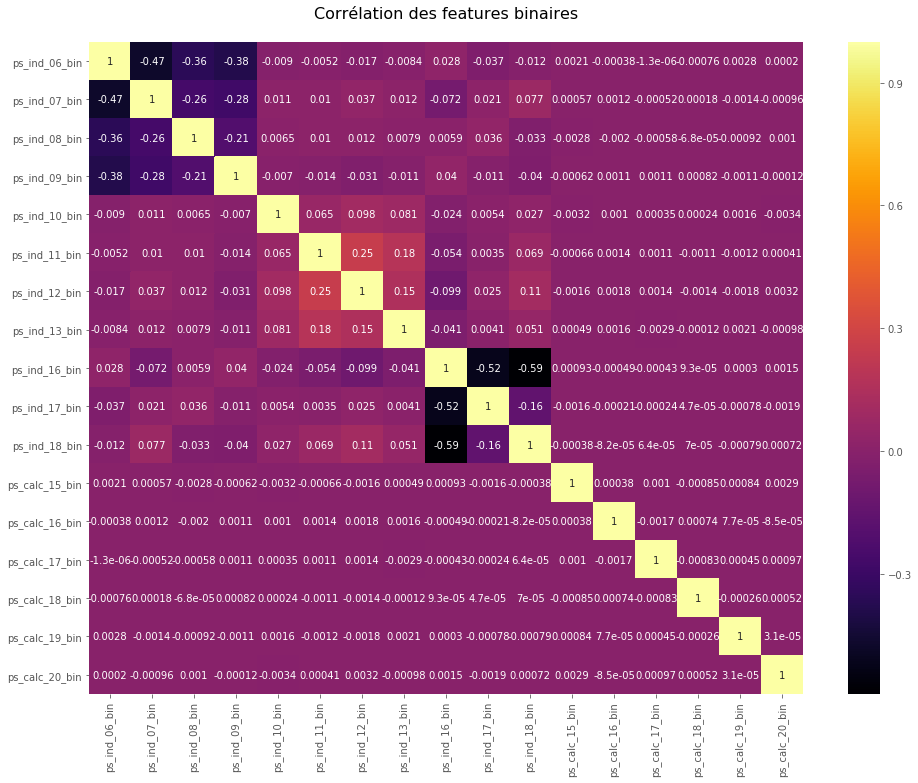

In [25]:
correlation_features('binaires', bin_featnames, donnees)

Observation

#### Corrélation des features catégorielles

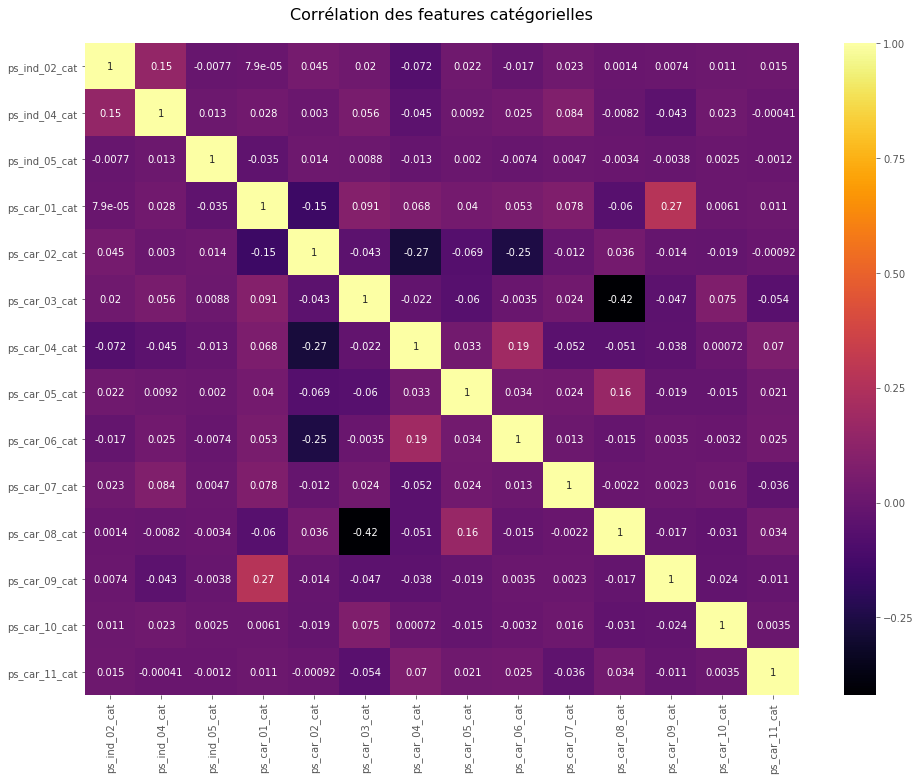

In [26]:
correlation_features('catégorielles', cat_featnames,donnees)

Observation

#### Corrélation des features continues

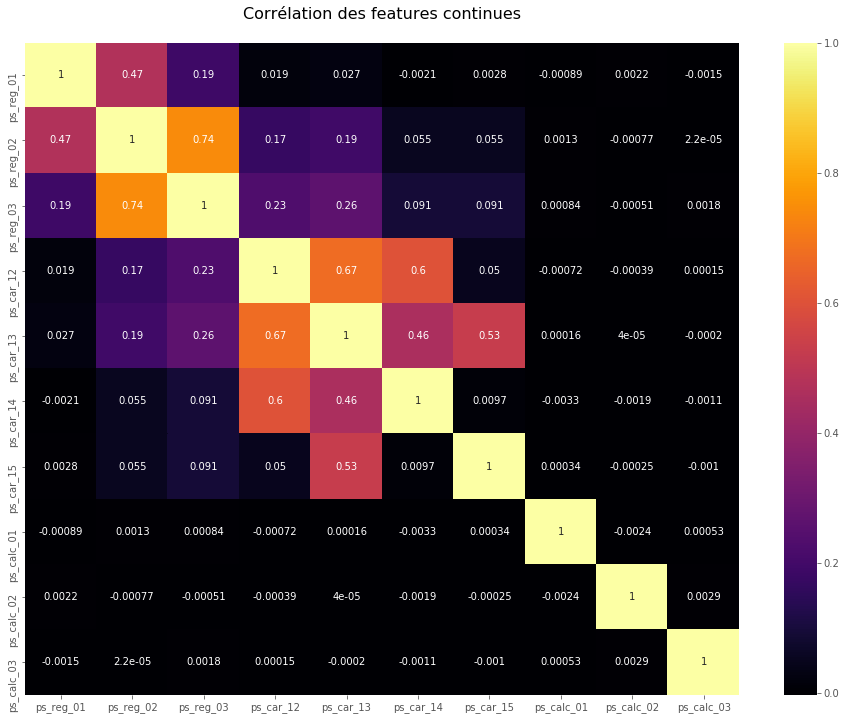

In [27]:
correlation_features('continues', cont_featnames,donnees)

Observation

#### Corrélation des features ordinales

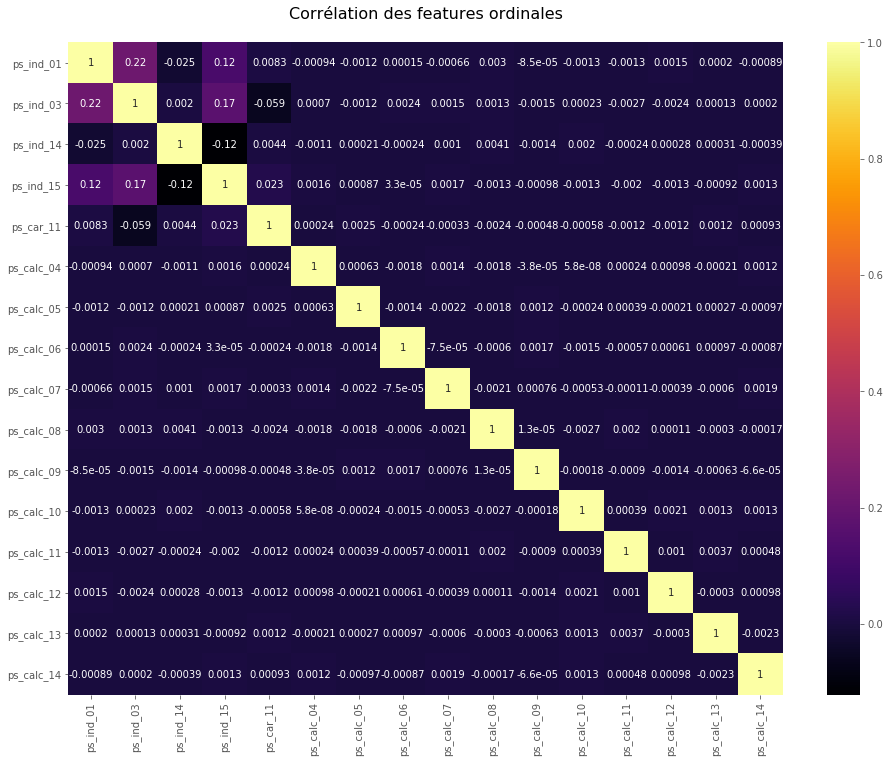

In [28]:
correlation_features('ordinales', ord_featnames, donnees)

Observation

### Distribution des features

#### Catégorielles

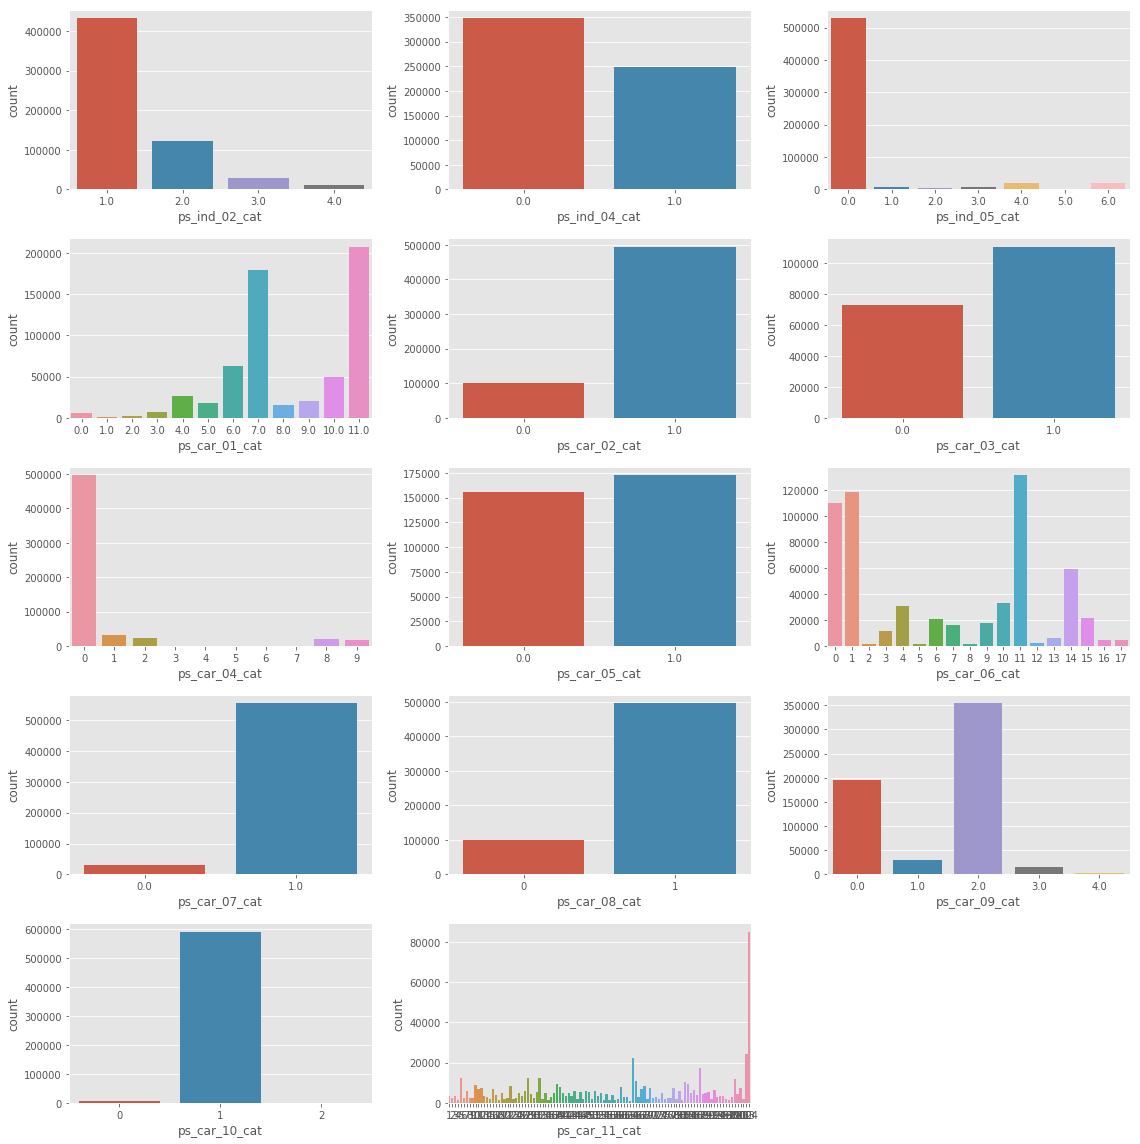

In [29]:
fig , axes = plt.subplots(nrows=5,ncols=3,figsize=(16,16))
for i , colname in enumerate(cat_featnames):
    sns.countplot(colname,data=donnees[cat_featnames],ax=fig.axes[i])
plt.tight_layout()
fig.delaxes(axes[4][2])

#### Binaires

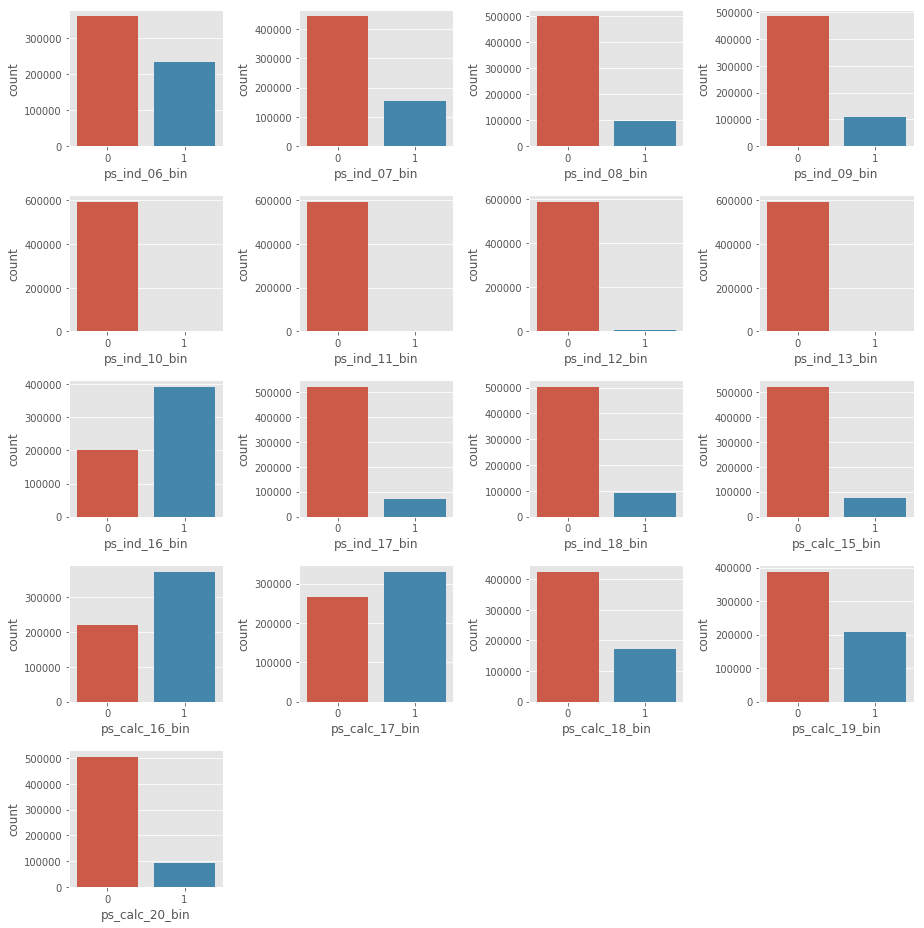

In [30]:
fig , axes = plt.subplots(nrows=5,ncols=4,figsize=(13,13))
for i , colname in enumerate(bin_featnames):
    sns.countplot(colname,data=donnees[bin_featnames],ax=fig.axes[i])
plt.tight_layout()
for i in range(1,4):
    fig.delaxes(axes[4][i])

#### Continues

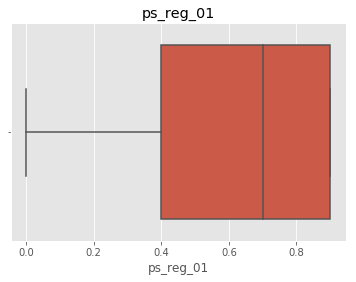

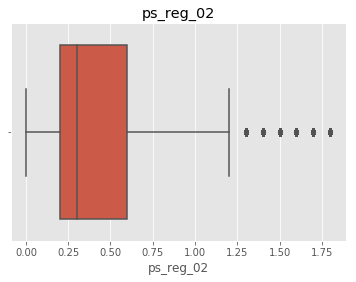

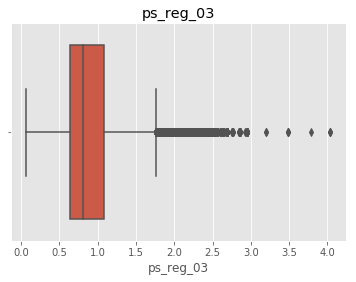

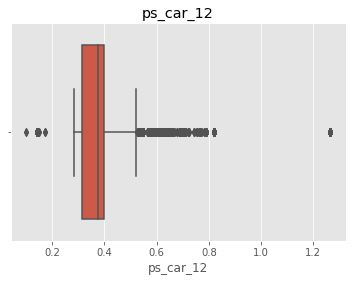

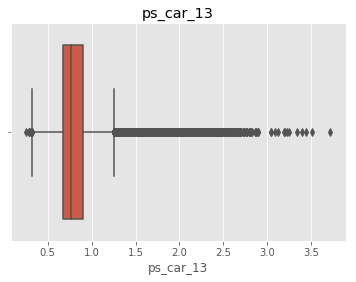

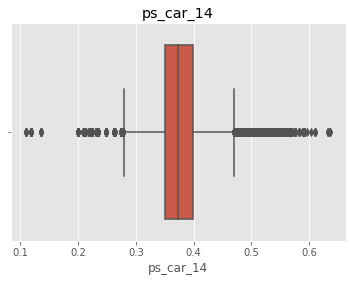

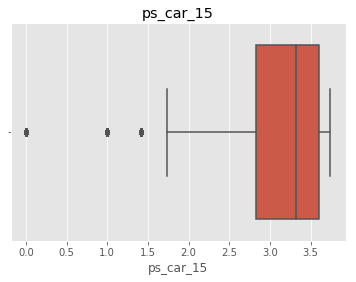

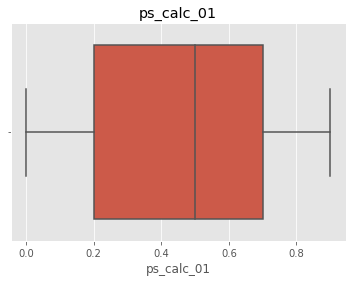

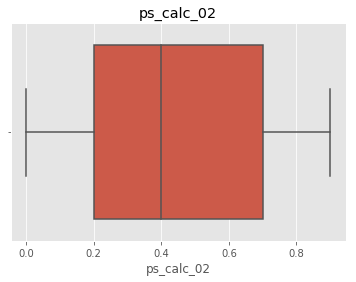

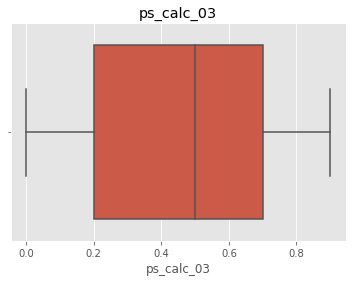

In [31]:
compt=0
for i, colname in enumerate(cont_featnames):
    plt.figure(compt)
    sns.boxplot(x=colname, 
                #hue='target', 
                data=donnees)
    plt.title(colname)
    compt+=1

#### Ordinales

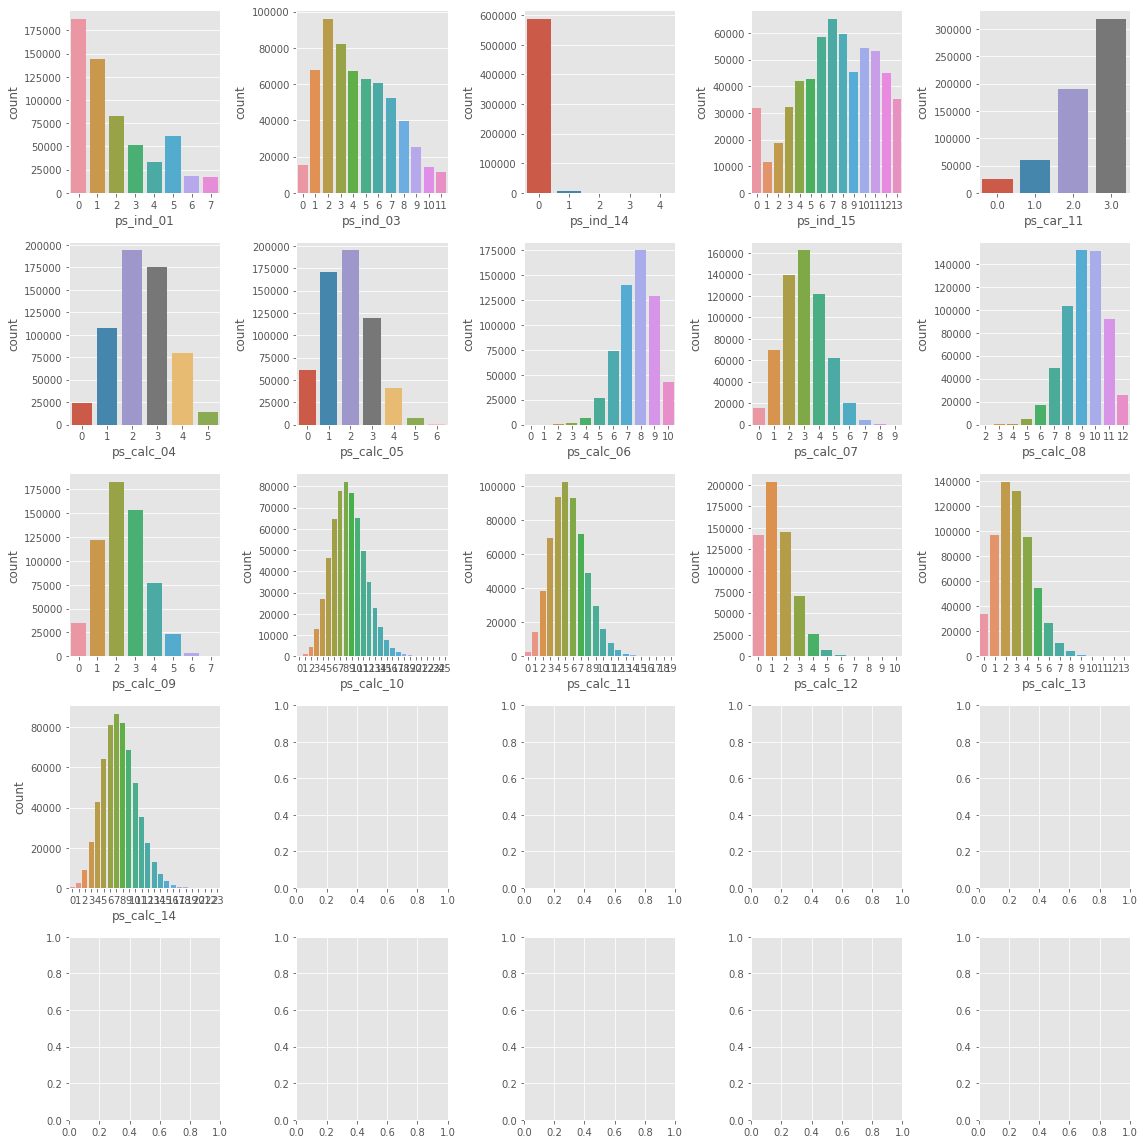

In [32]:
fig , axes = plt.subplots(nrows=5,ncols=5,figsize=(16,16))
for i , colname in enumerate(ord_featnames):
    sns.countplot(colname,data=donnees[ord_featnames],ax=fig.axes[i])
plt.tight_layout()
#fig.delaxes(axes[4][2])

<a id='preprocess'></a>
# II. Pré-traitement des données

## 1) Suppression de features 

Les features ps_car_03_cat, ps_car_05_cat et ps_reg_03 ont trop de valeurs manquantes. On va donc les supprimer :

In [33]:
donnees.drop(['ps_car_03_cat','ps_car_05_cat','ps_reg_03'], axis=1, inplace=True)
donnees_test.drop(['ps_car_03_cat','ps_car_05_cat','ps_reg_03'], axis=1, inplace=True)
cont_featnames.remove('ps_reg_03')
cat_featnames.remove('ps_car_03_cat')
cat_featnames.remove('ps_car_05_cat')

On supprime également la colonne id (à cause de sa valeur prédictive nulle) :

In [34]:
donnees.drop(['id'],axis=1, inplace=True)
donnees_test.drop(['id'],axis=1, inplace=True)

In [35]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 55 columns):
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     594996 non-null float64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595129 non-null float64
ps_ind_05_cat     589403 non-null float64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_car_01_cat     595105 non-null float

In [36]:
donnees_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 54 columns):
ps_ind_01         892816 non-null int64
ps_ind_02_cat     892509 non-null float64
ps_ind_03         892816 non-null int64
ps_ind_04_cat     892671 non-null float64
ps_ind_05_cat     884106 non-null float64
ps_ind_06_bin     892816 non-null int64
ps_ind_07_bin     892816 non-null int64
ps_ind_08_bin     892816 non-null int64
ps_ind_09_bin     892816 non-null int64
ps_ind_10_bin     892816 non-null int64
ps_ind_11_bin     892816 non-null int64
ps_ind_12_bin     892816 non-null int64
ps_ind_13_bin     892816 non-null int64
ps_ind_14         892816 non-null int64
ps_ind_15         892816 non-null int64
ps_ind_16_bin     892816 non-null int64
ps_ind_17_bin     892816 non-null int64
ps_ind_18_bin     892816 non-null int64
ps_reg_01         892816 non-null float64
ps_reg_02         892816 non-null float64
ps_car_01_cat     892656 non-null float64
ps_car_02_cat     892811 non-null flo

On remplace maintenant les données manquantes des autres features :
* Pour les features binaires, catégorielles et ordinales,  vu qu'il s'agit de valeurs entières, on choisit de les remplacer par la valeur la plus rencontrée dans la colonne
* Pour les features continues, on les remplace par la moyenne des valeurs de la colonne

In [37]:
val_manquantes2=donnees.columns[donnees.isna().any()].tolist()
val_manquantes2

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_14']

In [38]:
val_manquantes_test2=donnees_test.columns[donnees_test.isna().any()].tolist()
val_manquantes_test2

['ps_ind_02_cat',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_07_cat',
 'ps_car_09_cat',
 'ps_car_11',
 'ps_car_14']

In [39]:
donnees.isna().sum().sum()

60904

In [40]:
donnees_test.isna().sum().sum()

91341

In [41]:
#donnees2=donnees

for c in (bin_featnames + cat_featnames + ord_featnames):
    donnees[c].fillna(value=donnees[c].mode()[0], inplace=True)
    donnees_test[c].fillna(value=donnees_test[c].mode()[0], inplace=True)
    
for c in cont_featnames:
    donnees[c].fillna(value=donnees[c].mean(), inplace=True)
    donnees_test[c].fillna(value=donnees_test[c].mean(), inplace=True)       

In [42]:
donnees.isna().sum().sum()

0

In [43]:
donnees_test.isna().sum().sum()

0

## 2) Encodage des données catégorielles 
[Retourner au sommaire](#toc)<br>

In [44]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

donnees = pd.get_dummies(donnees, columns=cat_featnames)

In [45]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Columns: 214 entries, target to ps_car_11_cat_104
dtypes: float64(10), int64(33), uint8(171)
memory usage: 292.3 MB


## 3) Centrage et réduction des variables continues 

In [46]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# standardization of non categorical features

scaler = StandardScaler()
#X_train = scaler.fit_transform(donnees.drop(['id','target'], axis=1))
X_train = scaler.fit_transform(donnees.drop(['target'], axis=1))

## 4) ACP

In [47]:
y_train = donnees['target'].values.astype(np.int8)

from sklearn.decomposition import PCA

target_names = np.unique(y_train)
n_components=175

#ACP
acp = PCA(n_components=n_components, svd_solver='full', random_state=2018)
donnees_acp = acp.fit_transform(X_train)

#Explained Variance
print('Explained variance: %.4f' % acp.explained_variance_ratio_.sum())
n = 20
print('Individual variance contributions (for the first ' + str(n) + ' components):')
for j in range(n):
    print(acp.explained_variance_ratio_[j])


#instanciation
#acp = PCA(svd_solver = 'full')

#coord = acp.fit_transform(X_cont)

#print(acp.n_components_)
#len(coord)

Explained variance: 0.9787
Individual variance contributions (for the first 20 components):
0.02711630145185389
0.016144795570076177
0.014698499921449103
0.013774675112344372
0.012344445214566407
0.011999389287840511
0.011470453852936742
0.011007169133946428
0.010531202995551667
0.010470122823966393
0.010198859805506463
0.010037291991494713
0.009712670202945318
0.009584994288316497
0.009314676385592666
0.009242313719278033
0.00891717591234915
0.008858716317816331
0.008689892191924118
0.008602503654141376


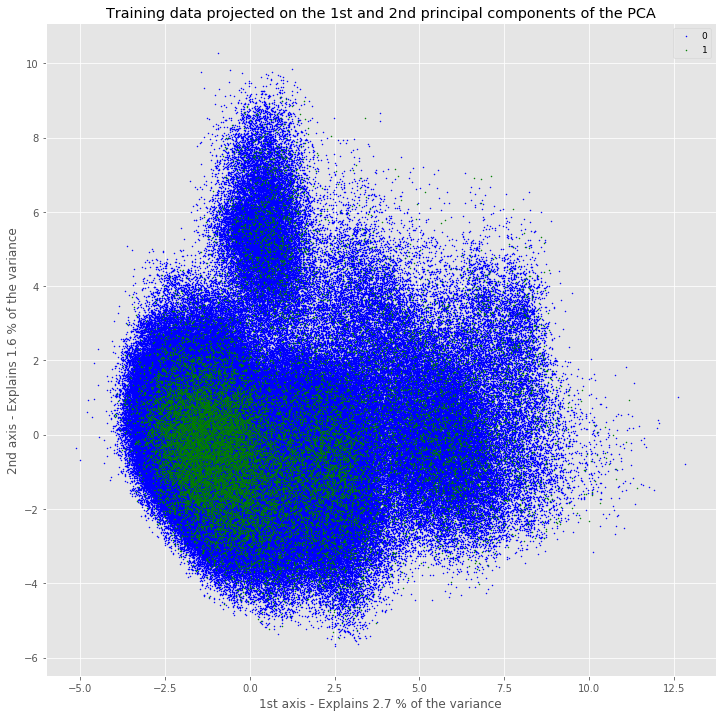

In [48]:
#Plot
plt.figure(1, figsize=(12, 12))
colors = ['blue', 'green']
for i in target_names:
    plt.scatter(donnees_acp[y_train == i, 0], donnees_acp[y_train == i, 1], color=colors[i], s=1, label=i)
plt.legend(fontsize=9)
plt.title("Training data projected on the 1st and 2nd principal components of the PCA")
plt.xlabel("1st axis - Explains %.1f %% of the variance" % (acp.explained_variance_ratio_[0] * 100.0))
plt.ylabel("2nd axis - Explains %.1f %% of the variance" % (acp.explained_variance_ratio_[1] * 100.0))

    
plt.show()

As we can see, it is not possible to differentiate 0s and 1s with the 1st and 2nd principal components of a PCA.
First, the first 20 components only explain less than a fourth of the variance. Second, 175 components still don't explain 100% of the variance so we better go with the 212 columns we got

<a id='traintest'></a>
# III. Entraînement et tests
[Retourner au sommaire](#toc)<br>

## 1) Choix du classifieur

### a)	Séparation du jeu de données

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

X=donnees.drop(['target'], axis=1)
#X=donnees.drop(['id','target'], axis=1)
y=target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)


### b)	Cross-validation des classifieurs

In [50]:
X_array = X_train.values
Y_array = y_train.values

X_learning = X_array[:10000][:,0:7]
Y_learning = Y_array[:10000]


kfold = StratifiedKFold(n_splits=5)


clfs = []    

clfs.append(("RF", RandomForestClassifier()) )
clfs.append(("AdaBoost", AdaBoostClassifier()) )
clfs.append(("GBoost", GradientBoostingClassifier()) )
clfs.append(("DTree", DecisionTreeClassifier()) )
clfs.append(("ExTree", ExtraTreeClassifier()) )
clfs.append(("LogReg", LogisticRegression()) )




clf_names = []
means = []
stds = []


for nom, clf in clfs:
    #cross validation among models, score based on accuracy
    cv_results = cross_val_score(clf, X_learning, Y_learning, scoring='roc_auc', cv=kfold)
    print(clf.__class__.__name__)
    #clf_names.append(clf.__class__.__name__)
    clf_names.append(nom)
    print("Result: " + str(cv_results))
    print("Mean: " + str(cv_results.mean()))
    print("Standard Deviation: " + str(cv_results.std())+'\n')
    means.append(cv_results.mean())
    stds.append(cv_results.std())

RandomForestClassifier
Result: [0.52970564 0.48071008 0.52552978 0.55062144 0.59185655]
Mean: 0.5356846993590312
Standard Deviation: 0.03616479755158139

AdaBoostClassifier
Result: [0.55713836 0.58046029 0.54159436 0.55382003 0.56362141]
Mean: 0.5593268868558905
Standard Deviation: 0.012764179603288111

GradientBoostingClassifier
Result: [0.55269376 0.52397831 0.53285227 0.57538002 0.54376733]
Mean: 0.545734337451127
Standard Deviation: 0.017722538781653918

DecisionTreeClassifier
Result: [0.51444024 0.49275737 0.52330334 0.56862872 0.58191428]
Mean: 0.5362087917530938
Standard Deviation: 0.033670429852353224

ExtraTreeClassifier
Result: [0.51444024 0.49275737 0.52322723 0.56862872 0.58191428]
Mean: 0.5361935682723971
Standard Deviation: 0.03367627807756256

LogisticRegression
Result: [0.53989633 0.55558931 0.53675329 0.521758   0.56737594]
Mean: 0.5442745750325242
Standard Deviation: 0.015776128225441714



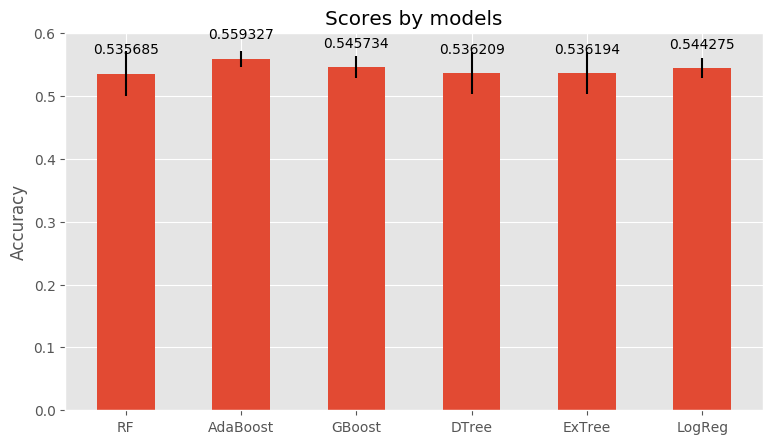

In [51]:
x_loc = np.arange(len(clfs))
width = 0.5


#bigger size in inches (width, height) & resolution(DPI)        
plt.figure(figsize=(9, 5), dpi=100) 

clf_graph = plt.bar(x_loc, means, width, yerr=stds)
plt.ylabel('Accuracy')
plt.title('Scores by models')
plt.xticks(x_loc, clf_names) # models name on x-axis

def addLabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
        '%f' % height, ha='center',
        va='bottom')
        
addLabel(clf_graph)
plt.show()

### c)	Courbes ROC

In [ ]:
clfrs = [
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    ExtraTreeClassifier(),
    LogisticRegression()
]

aucs = []
fprs = []
tprs = []
precisions = []
recalls = []
f1_scores = []

for clf in clfrs:
    print(clf.__class__.__name__)
    clf.fit(X_train, y_train)

    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])    
    fprs.append(fpr)
    tprs.append(tpr)
    aucs.append(auc(fpr, tpr))
    
    
    precision, recall, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_score(y_test, clf.predict(X_test)))  

RandomForestClassifier


In [ ]:
names = [clf.__class__.__name__ for clf in clfrs]

plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')

for fpr, tpr, auc, name in zip(fprs, tprs, aucs, names):
    plt.plot(fpr, tpr, label=name + ' (AUC=%.2f)' % auc, lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs \n False Positive Rate', fontsize=12)
plt.ylabel('Taux de Vrais Positifs \n True Positive Rate', fontsize=12)
plt.title('Receiver operating characteristic\n', fontsize=16)
plt.legend(loc="lower right", fontsize=10)


### d)	Courbes Precision-Recall

In [ ]:
plt.figure(figsize=(9, 7))

for precision, recall, f1_score, name in zip(precisions, recalls, f1_scores, names):
    plt.plot(recall, precision, label=name + ' (F1=%.5f)' % f1_score, lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Courbe Precision-Recall\n', fontsize=16)
plt.legend(loc="upper right", fontsize=11)

 ## 2) Tuning des hyperparamètres